#Alucar - Analisando as vendas

In [ ]:
import pandas as pd

In [ ]:
alucar = pd.read_csv('alucar.csv')
alucar

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63
5,2017-06-30,81
6,2017-07-31,101
7,2017-08-31,124
8,2017-09-30,148
9,2017-10-31,174


In [ ]:
print('A quantidade de linhas do dataset é {}'.format(alucar.count()) )

A quantidade de linhas do dataset é mes       24
vendas    24
dtype: int64


In [ ]:
print('A quantidade de linhas e colunas do dataset é {}'.format(alucar.shape))

A quantidade de linhas e colunas do dataset é (24, 2)


Temos dados nulos ?

In [ ]:
alucar.isnull()

,mes,vendas
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


In [ ]:
alucar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   mes     24 non-null     object
 1   vendas  24 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 512.0+ bytes


In [ ]:
print('Quantidade de dados nulos no dataset {}'.format(alucar.isna().sum().sum()))

Quantidade de dados nulos no dataset 0


In [ ]:
#datatype de cada coluna
alucar.dtypes

mes       object
vendas     int64
dtype: object

In [ ]:
alucar['mes'] = pd.to_datetime(alucar['mes'])
alucar.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [ ]:
!pip install seaborn==0.9.0

In [ ]:
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
print('Versão do seaborn', sns.__version__)

Versão do seaborn 0.9.0


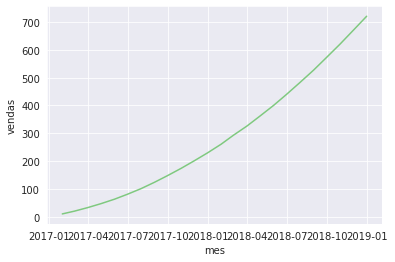

In [ ]:
sns.lineplot(x='mes', y='vendas',data=alucar)

Time series é uma coleção de observações feita atravez de um espaço de tempo

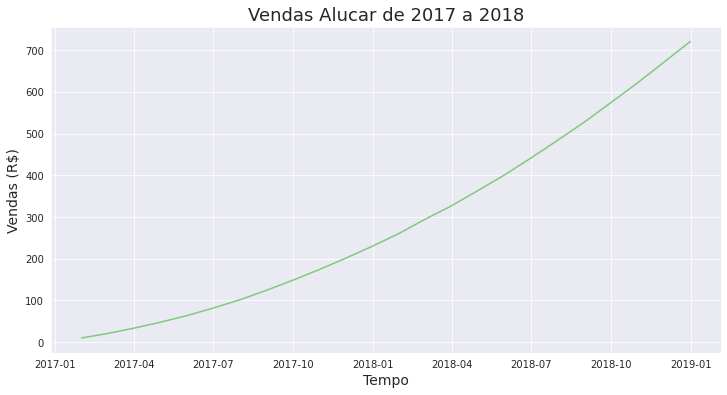

In [ ]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.lineplot(x='mes', y='vendas',data=alucar) # Quando atribuo esse linha a uma variável o titulo some
ax.figure.set_size_inches(12,6) # Tamanho do gráfico
ax.set_title('Vendas Alucar de 2017 a 2018', loc='center', fontsize=18)
ax.set_xlabel('Tempo', fontsize=14)
ax.set_ylabel('Vendas (R$)', fontsize=14)
ax =ax # Elimina o Text

In [ ]:
alucar.sample(5)

,mes,vendas
16,2018-05-31,400
23,2018-12-31,721
6,2017-07-31,101
15,2018-04-30,362
18,2018-07-31,483


In [ ]:
alucar['Aumento'] = alucar['vendas'].diff() # Saber  a diferença no valor das vendas
# de um mes para o outro (relação ao valor do mes anterior)

In [ ]:
alucar.head(5)

,mes,vendas,Aumento
0,2017-01-31,10,NaN
1,2017-02-28,20,10.0
2,2017-03-31,33,13.0
3,2017-04-30,47,14.0
4,2017-05-31,63,16.0


In [ ]:
#alucar.fillna(0,inplace=True)
#alucar.head(5) # tratando valor  nulo do 1 mes de venda

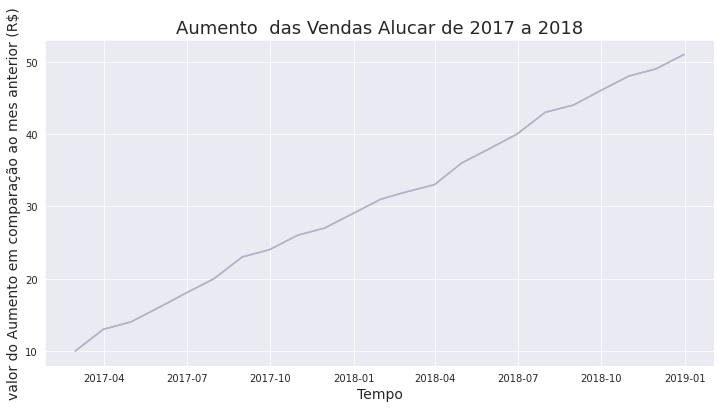

In [ ]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
sns.lineplot(x='mes', y='Aumento', data=alucar)

# formatando gráfico

ax = sns.lineplot(x='mes', y='Aumento', data=alucar)
ax.figure.set_size_inches(12,6)
ax.set_title('Aumento  das Vendas Alucar de 2017 a 2018', loc='center',fontsize=18)
ax.set_xlabel('Tempo', fontsize = 14)
ax.set_ylabel('valor do Aumento em comparação ao mes anterior (R$)', fontsize = 14)
ax = ax


In [ ]:
def plotar(titulo, labelx, labely, x, y, dataset):
  sns.set_palette('Accent')
  sns.set_style('darkgrid')
  #sns.lineplot(x='mes', y='Aumento', data=alucar)

# formatando gráfico

  ax = sns.lineplot(x=x, y=y, data=dataset)
  ax.figure.set_size_inches(12,6)
  ax.set_title(titulo, loc='center',fontsize=18)
  ax.set_xlabel(labelx, fontsize = 14)
  ax.set_ylabel(labely, fontsize = 14)
  ax = ax

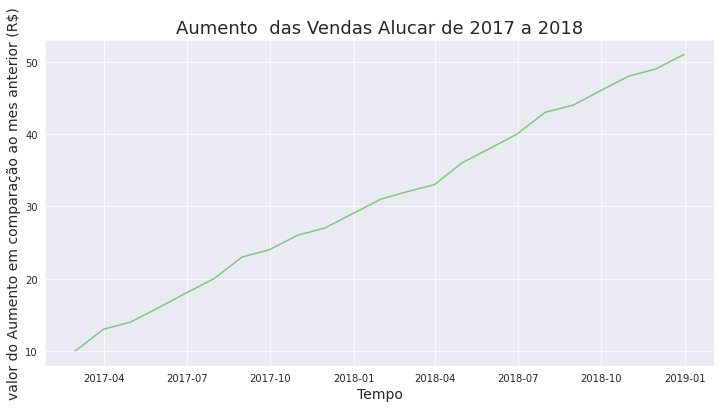

In [ ]:
plotar('Aumento  das Vendas Alucar de 2017 a 2018','Tempo', 'valor do Aumento em comparação ao mes anterior (R$)','mes','Aumento', alucar )

In [ ]:
alucar['Aceleracao'] = alucar['Aumento'].diff()
#alucar.fillna(0,inplace=True)
alucar

,mes,vendas,Aumento,Aceleracao
0,2017-01-31,10,NaN,NaN
1,2017-02-28,20,10.0,NaN
2,2017-03-31,33,13.0,3.0
3,2017-04-30,47,14.0,1.0
4,2017-05-31,63,16.0,2.0
5,2017-06-30,81,18.0,2.0
6,2017-07-31,101,20.0,2.0
7,2017-08-31,124,23.0,3.0
8,2017-09-30,148,24.0,1.0
9,2017-10-31,174,26.0,2.0


Nesse caso tratar nulos gerados apos o diff prejudica a análise

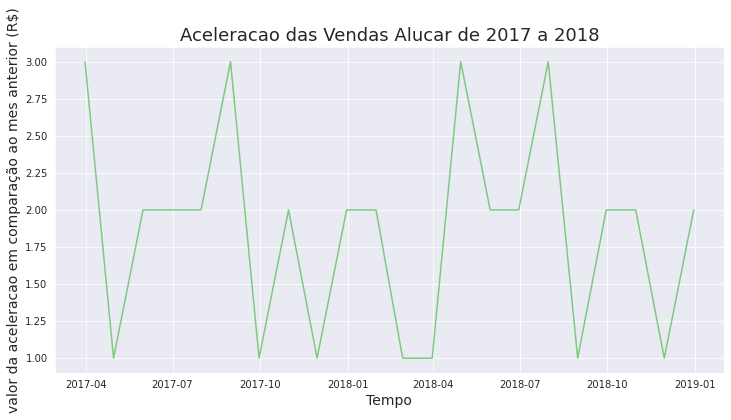

In [ ]:
plotar('Aceleracao das Vendas Alucar de 2017 a 2018','Tempo', 'valor da aceleracao em comparação ao mes anterior (R$)','mes','Aceleracao', alucar )

Aceleração do aumento de vendas apesar de não ser constante é sempre positivo

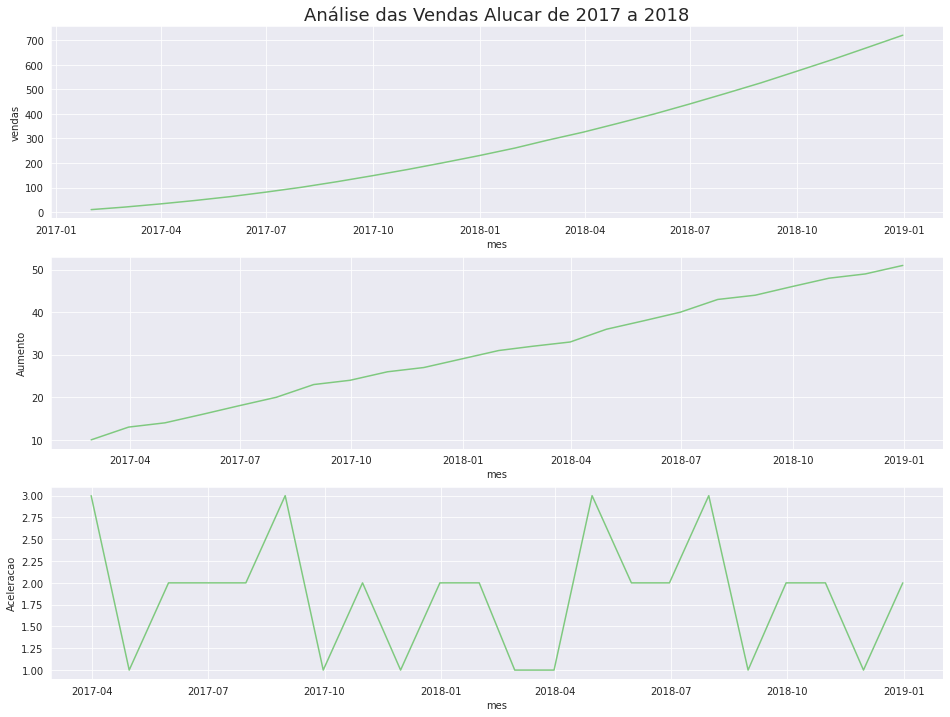

In [ ]:
plt.figure(figsize=(16,12))
ax = plt.subplot(3,1,1)
ax.set_title('Análise das Vendas Alucar de 2017 a 2018', loc='center',fontsize=18)
ax = sns.lineplot(x='mes', y='vendas',data=alucar)
ax = plt.subplot(3,1,2)
ax = sns.lineplot(x='mes', y='Aumento', data=alucar)
ax = plt.subplot(3,1,3)
ax = sns.lineplot(x='mes', y='Aceleracao', data=alucar)




In [ ]:
def plot_comparacao(x, y1,y2,y3,dataset, titulo):
  plt.figure(figsize=(16,12))
  ax = plt.subplot(3,1,1)
  ax.set_title(titulo, loc='center',fontsize=18)
  ax = sns.lineplot(x=x, y=y1,data=dataset)
  ax = plt.subplot(3,1,2)
  ax = sns.lineplot(x=x, y=y2, data=dataset)
  ax = plt.subplot(3,1,3)
  ax = sns.lineplot(x=x, y=y3, data=dataset)

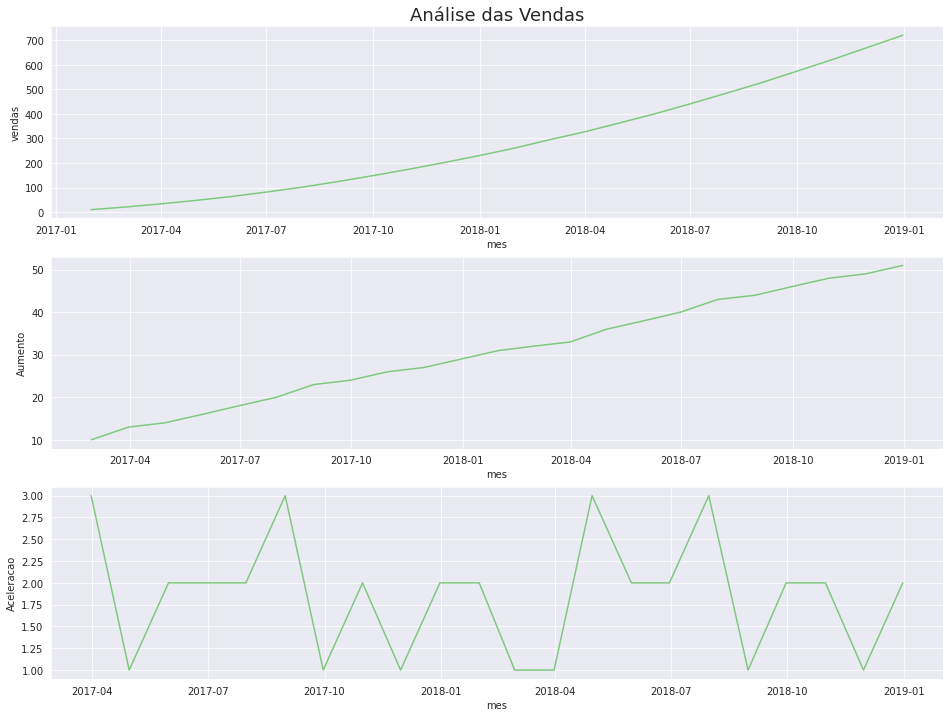

In [ ]:
plot_comparacao('mes', 'vendas', 'Aumento', 'Aceleracao', alucar, 'Análise das Vendas')

Tendencia de aumento da time series

# Autocorrelacao

Autocorrelação comparada os dados com ele mesmo

In [ ]:
from pandas.plotting import autocorrelation_plot

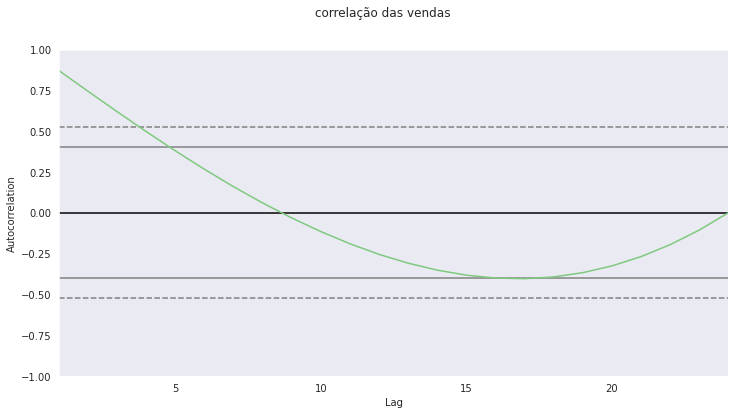

In [ ]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('correlação das vendas')
autocorrelation_plot(alucar['vendas'])
ax=ax

A uma correlação até um  certo  ponto. 

A uma correlação entre os primeiros 7 meses se comparado com os anteriores

Pórem nos meses seguintes vai diminuindo

OBS: nível de correlação 1 a -1

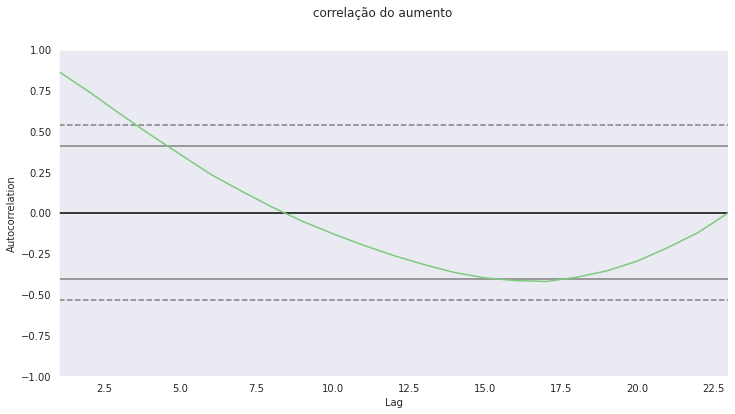

In [ ]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('correlação do aumento')
autocorrelation_plot(alucar['Aumento'][1:]) # segundo o gráfico a analise começa do indice 1
ax=ax

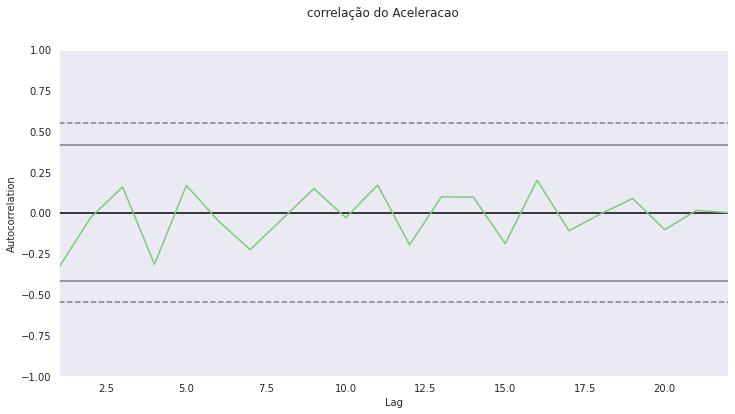

In [ ]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('correlação do Aceleracao')
autocorrelation_plot(alucar['Aceleracao'][2:]) # segundo o gráfico a analise começa do indice 2
ax=ax

# Analisando assinantes da newsletter

In [ ]:
assinantes = pd.read_csv('newsletter_alucar.csv')
assinantes

,mes,assinantes
0,2017-01-31,0
1,2017-02-28,10
2,2017-03-31,21
3,2017-04-30,34
4,2017-05-31,49
5,2017-06-30,66
6,2017-07-31,85
7,2017-08-31,107
8,2017-09-30,132
9,2017-10-31,160


In [ ]:
assinantes.dtypes

mes           object
assinantes     int64
dtype: object

In [ ]:
print('Quantidade de linhas e colunas ', assinantes.shape)
print('Quantidade de  nulos ', assinantes.isna().sum().sum())

Quantidade de linhas e colunas  (24, 2)
Quantidade de  nulos  0


In [ ]:
assinantes['mes'] = pd.to_datetime(assinantes['mes'])
assinantes.dtypes

mes           datetime64[ns]
assinantes             int64
dtype: object

In [ ]:
assinantes['Aumento'] = assinantes['assinantes'].diff()
assinantes

,mes,assinantes,Aumento
0,2017-01-31,0,NaN
1,2017-02-28,10,10.0
2,2017-03-31,21,11.0
3,2017-04-30,34,13.0
4,2017-05-31,49,15.0
5,2017-06-30,66,17.0
6,2017-07-31,85,19.0
7,2017-08-31,107,22.0
8,2017-09-30,132,25.0
9,2017-10-31,160,28.0


In [ ]:
assinantes['Aceleracao'] = assinantes['Aumento'].diff()
assinantes

,mes,assinantes,Aumento,Aceleracao
0,2017-01-31,0,NaN,NaN
1,2017-02-28,10,10.0,NaN
2,2017-03-31,21,11.0,1.0
3,2017-04-30,34,13.0,2.0
4,2017-05-31,49,15.0,2.0
5,2017-06-30,66,17.0,2.0
6,2017-07-31,85,19.0,2.0
7,2017-08-31,107,22.0,3.0
8,2017-09-30,132,25.0,3.0
9,2017-10-31,160,28.0,3.0


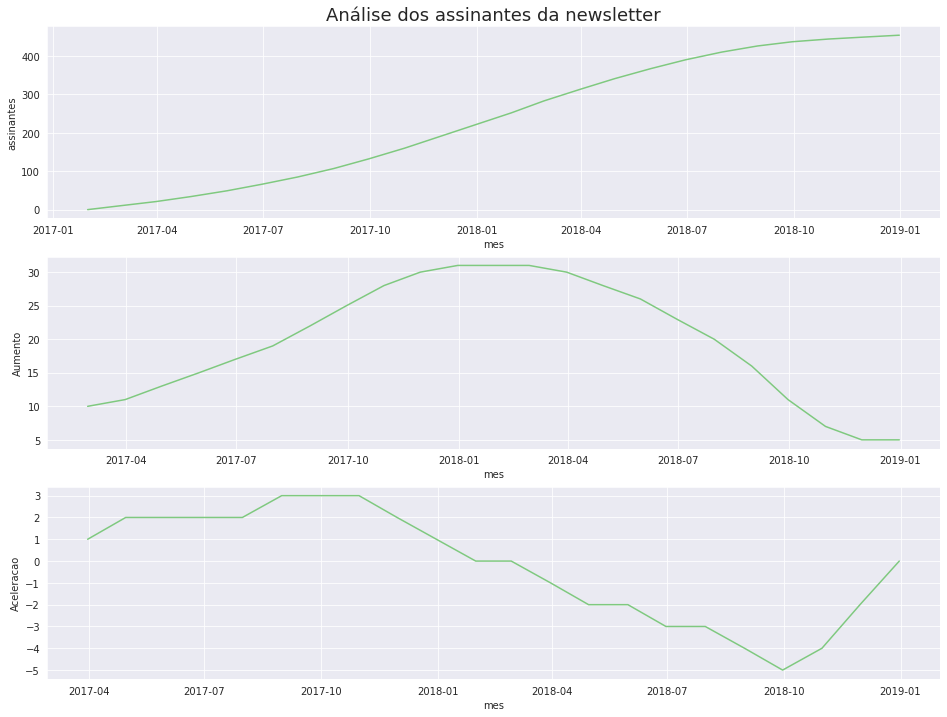

In [ ]:
plot_comparacao('mes','assinantes','Aumento','Aceleracao',assinantes,'Análise dos assinantes da newsletter')

 

*   Temos uma tendência de aumento no número de assinantes
*   O valor de aumento do assinante se mantém crescente até aproximadamente Março de 2018, apartir daí o valor começa a cair, porém se mantém positivo.
*   A aceleração do aumento de assinantes é bastante váriante. No mês 04 a aceleração se torna negativa, ou seja não ocorreu crescimento até novembro de 2018










# Chocolura - Analisando as vendas

In [ ]:
chocolura = pd.read_csv('chocolura.csv')
chocolura

,mes,vendas
0,2017-01,210
1,2017-02,185
2,2017-03,209
3,2017-04,280
4,2017-05,211
5,2017-06,300
6,2017-07,210
7,2017-08,205
8,2017-09,208
9,2017-10,210


In [ ]:
chocolura.dtypes

mes       object
vendas     int64
dtype: object

In [ ]:
chocolura['mes'] = pd.to_datetime(chocolura['mes'])
chocolura.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [ ]:
print('Quantidade de linhas e colunas', chocolura.shape)
print('Quantidade de dado nulo', chocolura.isnull().sum().sum())

Quantidade de linhas e colunas (24, 2)
Quantidade de dado nulo 0


Realizando a diferença das vendas

In [ ]:
chocolura['Aumento'] = chocolura['vendas'].diff()

In [ ]:
chocolura['Aceleracao'] = chocolura['Aumento'].diff()

In [ ]:
chocolura

,mes,vendas,Aumento,Aceleracao
0,2017-01-01,210,NaN,NaN
1,2017-02-01,185,-25.0,NaN
2,2017-03-01,209,24.0,49.0
3,2017-04-01,280,71.0,47.0
4,2017-05-01,211,-69.0,-140.0
5,2017-06-01,300,89.0,158.0
6,2017-07-01,210,-90.0,-179.0
7,2017-08-01,205,-5.0,85.0
8,2017-09-01,208,3.0,8.0
9,2017-10-01,210,2.0,-1.0


Plotar os gráficos

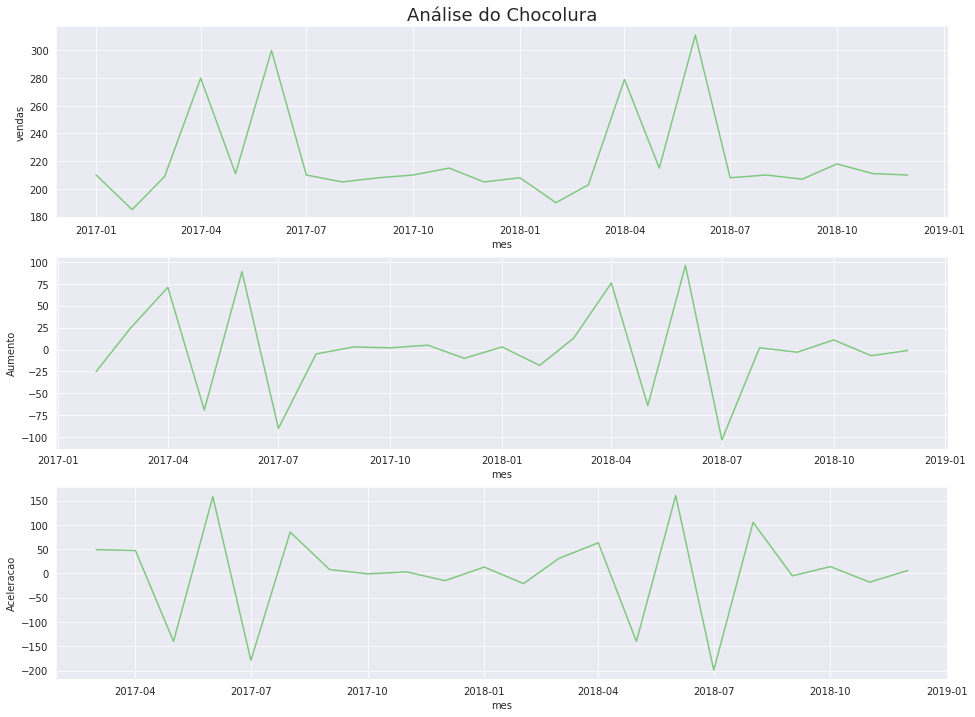

In [ ]:
plot_comparacao('mes','vendas','Aumento','Aceleracao',chocolura,'Análise do Chocolura')

* A venda vária muito ao londo do ano porém há uma tendência no aumento das vendas próximo a Abril e julho

* O aumento da quantidade de vendas é variante e semelhante ao total das vendas. Em muitos meses não ocorreu aumento das vendas 

* Aceleracao variante em alguns meses não há aceleração do aumento nas vendas

OBS: gráfico mostra uma sazonalidade
* Em Abril temos a Pascoa como data comercial
* Em  julho o dia dos namorados

# Chocolura- vendas diárias(Outubro e Novembro)

In [ ]:
vendas_por_dia = pd.read_csv('vendas_por_dia.csv')
vendas_por_dia.head(15)

,dia,vendas
0,2018-10-01,50
1,2018-10-02,48
2,2018-10-03,56
3,2018-10-04,50
4,2018-10-05,51
5,2018-10-06,18
6,2018-10-07,20
7,2018-10-08,50
8,2018-10-09,53
9,2018-10-10,56


In [ ]:
vendas_por_dia.dtypes

dia       object
vendas     int64
dtype: object

In [ ]:
vendas_por_dia['dia'] = pd.to_datetime(vendas_por_dia['dia'])
vendas_por_dia.dtypes

dia           datetime64[ns]
vendas                 int64
Aumento              float64
Aceleracao           float64
dtype: object

In [ ]:
print("Quantidade de linhas e colunas", vendas_por_dia.shape)
print('Quantidade de valor nulo', vendas_por_dia.isna().sum().sum()) # dados do ano de 2018 

Quantidade de linhas e colunas (61, 2)
Quantidade de valor nulo 0


In [ ]:
vendas_por_dia['Aumento'] = vendas_por_dia['vendas'].diff()
vendas_por_dia['Aceleracao'] = vendas_por_dia['Aumento'].diff()
vendas_por_dia

,dia,vendas,Aumento,Aceleracao
0,2018-10-01,50,NaN,NaN
1,2018-10-02,48,-2.0,NaN
2,2018-10-03,56,8.0,10.0
3,2018-10-04,50,-6.0,-14.0
4,2018-10-05,51,1.0,7.0
...,...,...,...,...
56,2018-11-26,54,34.0,31.0
57,2018-11-27,60,6.0,-28.0
58,2018-11-28,49,-11.0,-17.0
59,2018-11-29,50,1.0,12.0


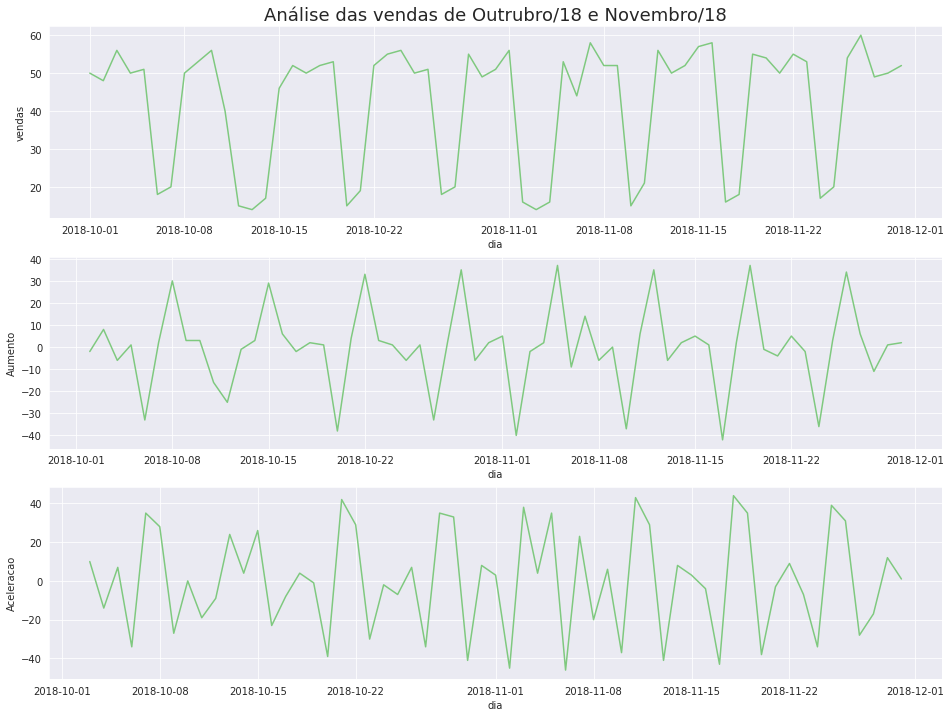

In [ ]:
plot_comparacao('dia', 'vendas','Aumento','Aceleracao',vendas_por_dia,'Análise das vendas de Outrubro/18 e Novembro/18')

Temos um padrão repetitivo em determinado tempo

**Analisando a sazonalidade**

In [ ]:
vendas_por_dia['dia_da_semana'] = vendas_por_dia['dia'].dt.day_name()
vendas_por_dia.head(7)

,dia,vendas,Aumento,Aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,Monday
1,2018-10-02,48,-2.0,NaN,Tuesday
2,2018-10-03,56,8.0,10.0,Wednesday
3,2018-10-04,50,-6.0,-14.0,Thursday
4,2018-10-05,51,1.0,7.0,Friday
5,2018-10-06,18,-33.0,-34.0,Saturday
6,2018-10-07,20,2.0,35.0,Sunday


In [ ]:
vendas_por_dia['dia_da_semana'].unique()

array(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday'], dtype=object)

In [ ]:
dias_traduzidos = {'Monday': 'Segunda', 'Tuesday': 'Terça', 'Wednesday': 'Quarta', 'Thursday':'Quinta', 'Friday':'Sexta', 'Saturday':'Sábado','Sunday':'Domingo'}

In [ ]:
dias_traduzidos

{'Friday': 'Sexta',
 'Monday': 'Segunda',
 'Saturday': 'Sábado',
 'Sunday': 'Domingo',
 'Thursday': 'Quinta',
 'Tuesday': 'Terça',
 'Wednesday': 'Quarta'}

In [ ]:
vendas_por_dia['dia_da_semana'] = vendas_por_dia['dia_da_semana'].map(dias_traduzidos)


In [ ]:
vendas_por_dia.head(14)

,dia,vendas,Aumento,Aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,Segunda
1,2018-10-02,48,-2.0,NaN,Terça
2,2018-10-03,56,8.0,10.0,Quarta
3,2018-10-04,50,-6.0,-14.0,Quinta
4,2018-10-05,51,1.0,7.0,Sexta
5,2018-10-06,18,-33.0,-34.0,Sábado
6,2018-10-07,20,2.0,35.0,Domingo
7,2018-10-08,50,30.0,28.0,Segunda
8,2018-10-09,53,3.0,-27.0,Terça
9,2018-10-10,56,3.0,0.0,Quarta


**Agrupando**

In [ ]:
vendas_agrupamento = vendas_por_dia.groupby('dia_da_semana')['vendas','Aumento','Aceleracao','dia_da_semana'].mean().round()
vendas_agrupamento

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,vendas,Aumento,Aceleracao
dia_da_semana,,,
Domingo,19.0,3.0,31.0
Quarta,53.0,1.0,2.0
Quinta,51.0,-2.0,-3.0
Segunda,52.0,34.0,31.0
Sexta,45.0,-7.0,-5.0
Sábado,16.0,-28.0,-20.0
Terça,52.0,-1.0,-34.0


Final de semana e feriados tem média de venda inferior aos dias utéis

**Correlação das vendas diárias**

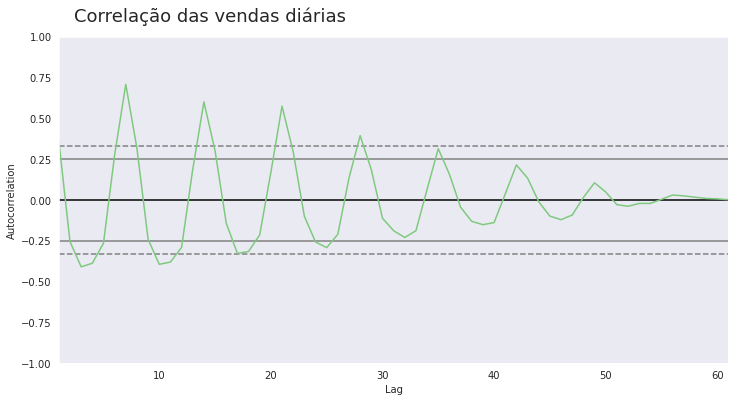

In [ ]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação das vendas diárias', fontsize=18,x=0.3, y=0.95)
autocorrelation_plot(vendas_por_dia['vendas'])
ax=ax

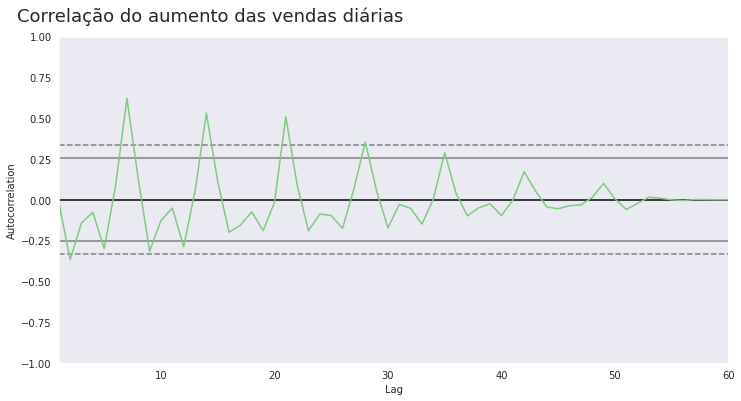

In [ ]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação do aumento das vendas diárias', fontsize=18,x=0.3, y=0.95)
autocorrelation_plot(vendas_por_dia['Aumento'][1:])
ax=ax

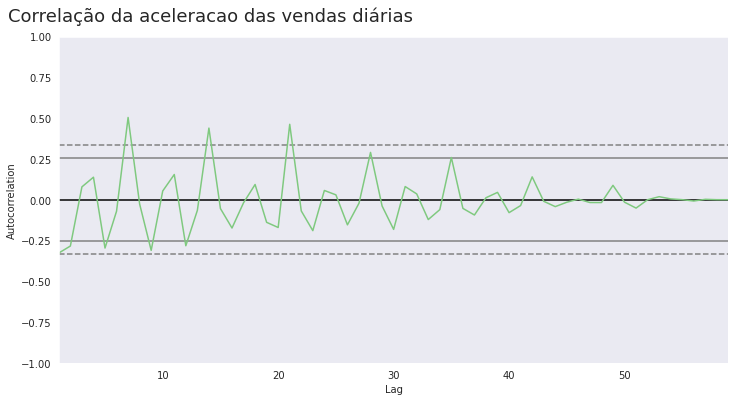

In [ ]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação da aceleracao das vendas diárias', fontsize=18,x=0.3, y=0.95)
autocorrelation_plot(vendas_por_dia['Aceleracao'][2:])
ax=ax

A autocorrelação é usada na maior parte dos casos para verificar periodicidade nos dados. O que chama de correlação forte mostra que a informação parece se repetir de tempos em tempos nos dados.

Por exemplo, quando estamos analisando e vemos que um padrão se repete podemos prever o melhor dia para vendas

# Cafelura- Analise de vendas

In [ ]:
cafelura = pd.read_csv('cafelura.csv')
cafelura.sample(3)

,mes,vendas
8,2017-09-30,11792
4,2017-05-31,5670
5,2017-06-30,7380


In [ ]:
cafelura.dtypes

mes       object
vendas     int64
dtype: object

In [ ]:
cafelura['mes'] = pd.to_datetime(cafelura['mes'])
cafelura.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [ ]:
print('Quantidade de linhas e colunas', cafelura.shape)
print('Quantidade de nulos', cafelura.isnull().sum().sum())

Quantidade de linhas e colunas (24, 2)
Quantidade de nulos 0


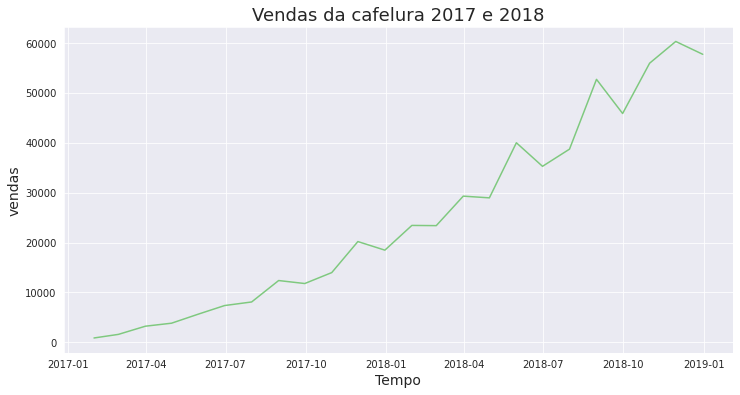

In [ ]:
plotar('Vendas da cafelura 2017 e 2018', 'Tempo', 'vendas','mes','vendas',cafelura)

Tendência de crescimento

In [ ]:
qte_dias_final_semana = pd.read_csv('dias_final_de_semana.csv')
qte_dias_final_semana.sample(15)

,quantidade_de_dias
19,10
14,9
7,10
2,10
17,8
6,8
12,9
9,8
5,9
21,9


In [ ]:
qte_dias_final_semana.dtypes

quantidade_de_dias    int64
dtype: object

In [ ]:
print('Quantidade de linhas e colunas ', qte_dias_final_semana.shape)
print('Quantidade de nulos', qte_dias_final_semana.isna().sum().sum())

Quantidade de linhas e colunas  (24, 1)
Quantidade de nulos 0


In [ ]:
qte_dias_final_semana['quantidade_de_dias'].values

array([ 8,  8, 10,  8,  9,  9,  8, 10,  8,  8, 10,  8,  9,  8,  9,  8, 10,
        8,  8, 10,  8,  9,  9,  8])

In [ ]:
cafelura['vendas_normalizadas'] = cafelura['vendas'] / qte_dias_final_semana['quantidade_de_dias'].values
cafelura.head()

,mes,vendas,vendas_normalizadas
0,2017-01-31,880,110.0
1,2017-02-28,1600,200.0
2,2017-03-31,3240,324.0
3,2017-04-30,3840,480.0
4,2017-05-31,5670,630.0


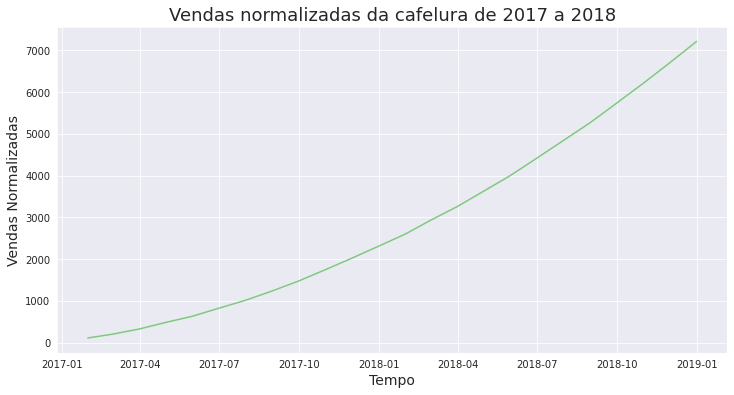

In [ ]:
plotar('Vendas normalizadas da cafelura de 2017 a 2018', 'Tempo', 'Vendas Normalizadas', 'mes','vendas_normalizadas', cafelura)

O número de vendas é expresso pelos meses e alguns meses vão ter mais ou menos dias de finais de semana e isso pode influenciar no número de vendas final do mês. 

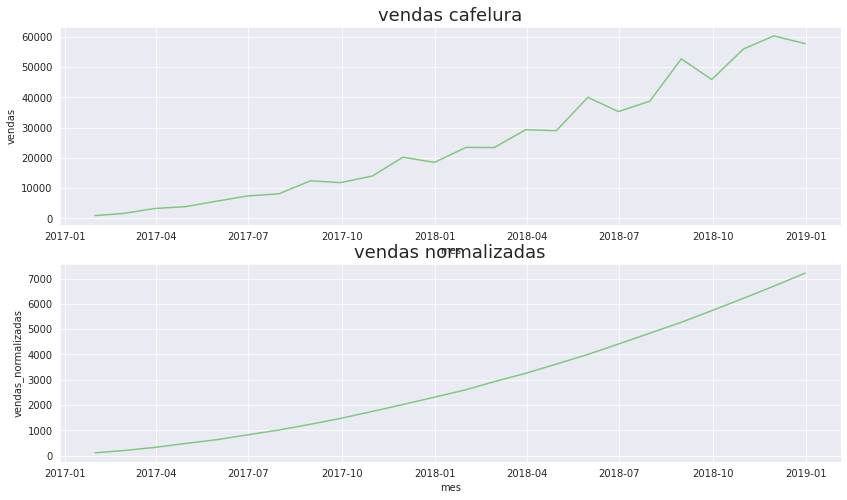

In [ ]:
plt.figure(figsize=(14,8))
ax = plt.subplot(2,1,1)
ax.set_title('vendas cafelura', fontsize=18)
sns.lineplot(x='mes', y='vendas', data=cafelura)
ax = plt.subplot(2,1,2)
ax.set_title('vendas normalizadas', fontsize=18)
sns.lineplot(x='mes', y='vendas_normalizadas', data=cafelura)
ax=ax

* Vendas pelo total de vendas no mês
* vendas normalizadas pela quantidade de final de semana no mês (Cada mês possui uma quantidade de final de semana distinta)

#statsmodel

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

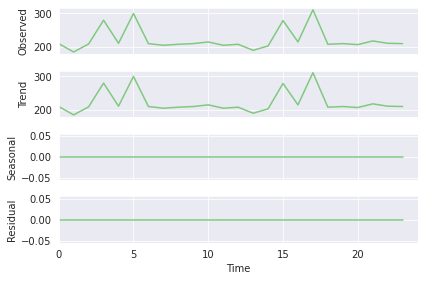

In [ ]:
resultado = seasonal_decompose([chocolura['vendas']], freq=1)
ax = resultado.plot()

1- o dado 2- a tendencia 3- a sazionalidade 4- o ruído

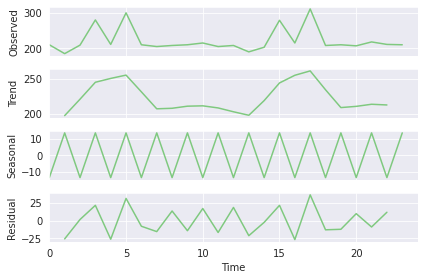

In [ ]:
resultado = seasonal_decompose([chocolura['vendas']], freq=2)
ax = resultado.plot()

Juntou os 2 crescimento no gráfico de tendencia

In [ ]:
observacao = resultado.observed
tendencia = resultado.trend
sazonalidade = resultado.seasonal
ruido = resultado.resid

In [ ]:
data = ({'observacao':observacao,
'tendencia' : tendencia,
'sazonalidade':sazonalidade,
'ruido':ruido
         })

In [ ]:
resultado = pd.DataFrame(data)
resultado.head(5)

,observacao,tendencia,sazonalidade,ruido
0,210,NaN,-13.386364,NaN
1,185,197.25,13.386364,-25.636364
2,209,220.75,-13.386364,1.636364
3,280,245.00,13.386364,21.613636
4,211,250.50,-13.386364,-26.113636


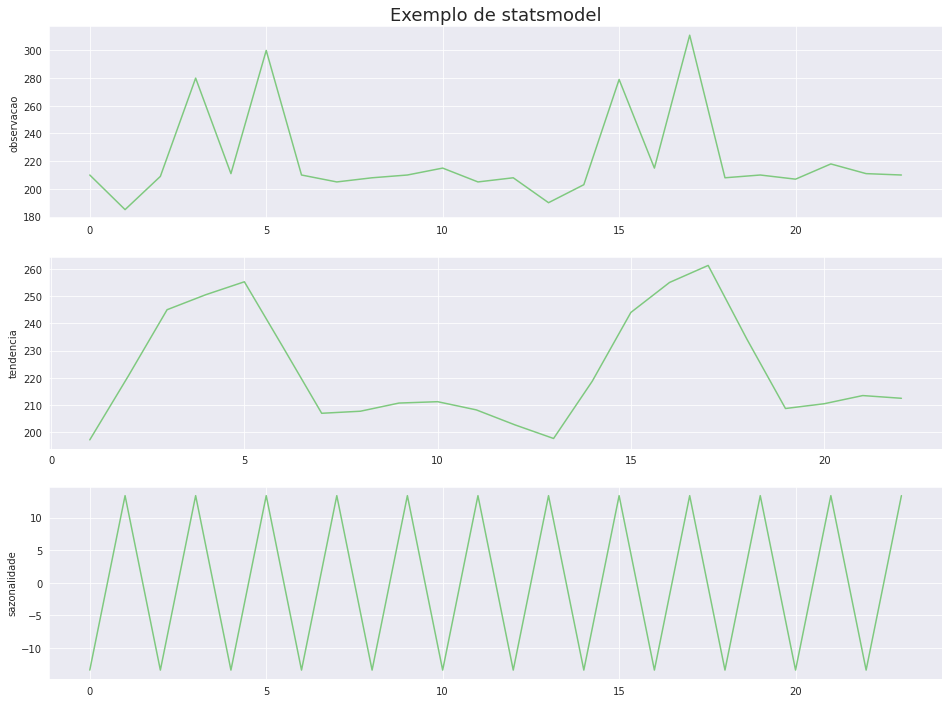

In [ ]:
plot_comparacao(resultado.index, 'observacao','tendencia','sazonalidade',resultado,'Exemplo de statsmodel')

# Alucel Análise de vendas

In [185]:
alucel = pd.read_csv('alucel.csv')
alucel.sample(5)

,dia,vendas
45,2018-11-15,10857.82
6,2018-10-07,3793.07
19,2018-10-20,3078.78
30,2018-10-31,7079.35
13,2018-10-14,2183.18


In [186]:
alucel.dtypes

dia        object
vendas    float64
dtype: object

In [187]:
alucel['dia'] = pd.to_datetime(alucel['dia'])
alucel.dtypes

dia       datetime64[ns]
vendas           float64
dtype: object

In [188]:
print('Quantidade de linhas e colunas', alucel.shape)
print('Quantidade de nulo', alucel.isna().sum().sum())

Quantidade de linhas e colunas (61, 2)
Quantidade de nulo 0


In [189]:
alucel['Aumento'] = alucel['vendas'].diff()
alucel['Aceleracao'] = alucel['Aumento'].diff()

In [191]:
alucel.head(5)

,dia,vendas,Aumento,Aceleracao
0,2018-10-01,1374.83,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN
2,2018-10-03,1860.36,-325.33,-1136.19
3,2018-10-04,1939.02,78.66,403.99
4,2018-10-05,1946.17,7.15,-71.51


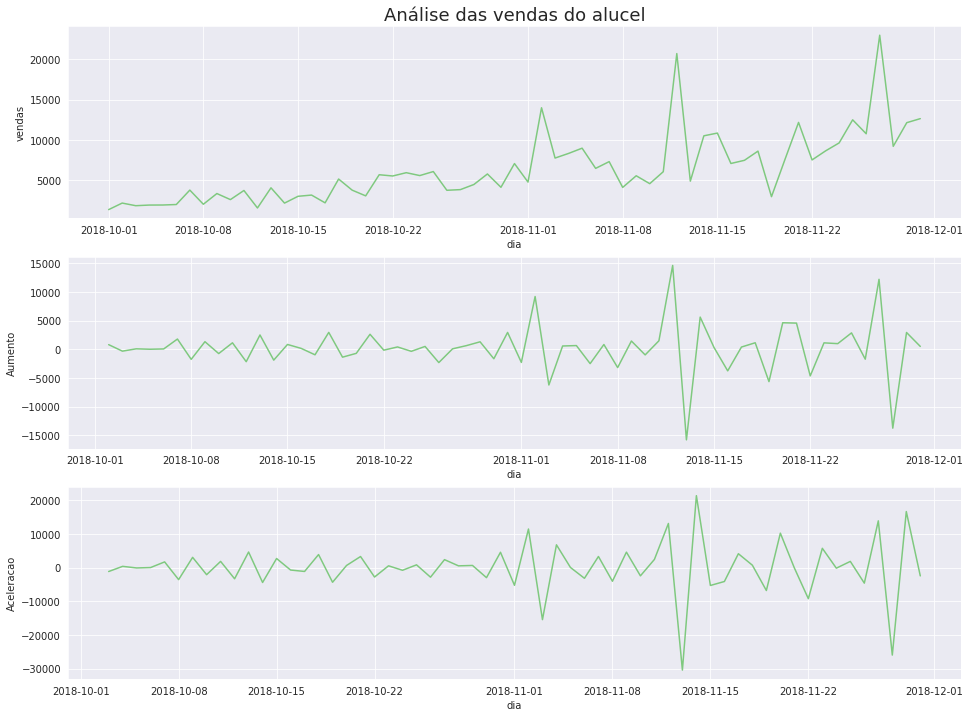

In [193]:
plot_comparacao('dia', 'vendas','Aumento', 'Aceleracao',alucel,'Análise das vendas do alucel')

Gráficos com bastante ruído

Será que a empresa está crescendo?

se sim, a tendencia é continuar a crescer?

**Média móvel**

In [194]:
alucel['media_movel'] = alucel['vendas'].rolling(7).mean()

In [196]:
alucel.head(7)

,dia,vendas,Aumento,Aceleracao,media_movel
0,2018-10-01,1374.83,NaN,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN,NaN
2,2018-10-03,1860.36,-325.33,-1136.19,NaN
3,2018-10-04,1939.02,78.66,403.99,NaN
4,2018-10-05,1946.17,7.15,-71.51,NaN
5,2018-10-06,2005.89,59.72,52.57,NaN
6,2018-10-07,3793.07,1787.18,1727.46,2157.861429


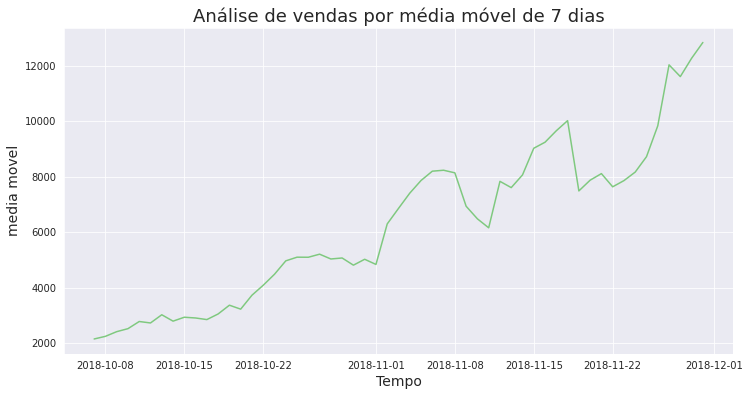

In [197]:
plotar('Análise de vendas por média móvel de 7 dias', 'Tempo','media movel', 'dia', 'media_movel', alucel)

In [198]:
alucel['media_movel_14'] = alucel['vendas'].rolling(14).mean()

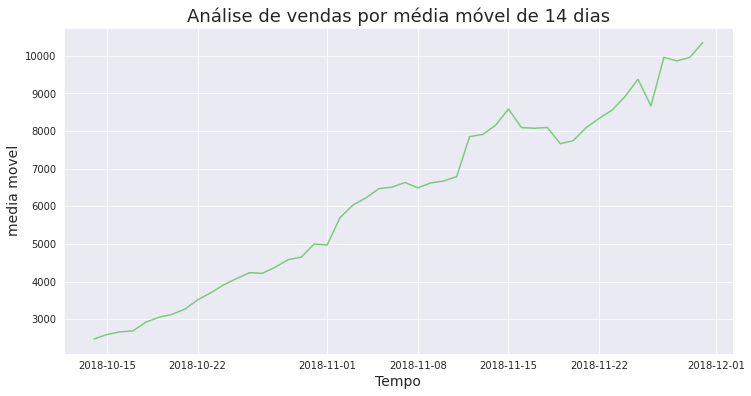

In [199]:
plotar('Análise de vendas por média móvel de 14 dias', 'Tempo','media movel', 'dia', 'media_movel_14', alucel)

Se fizer um roling muito grande perde-se informação

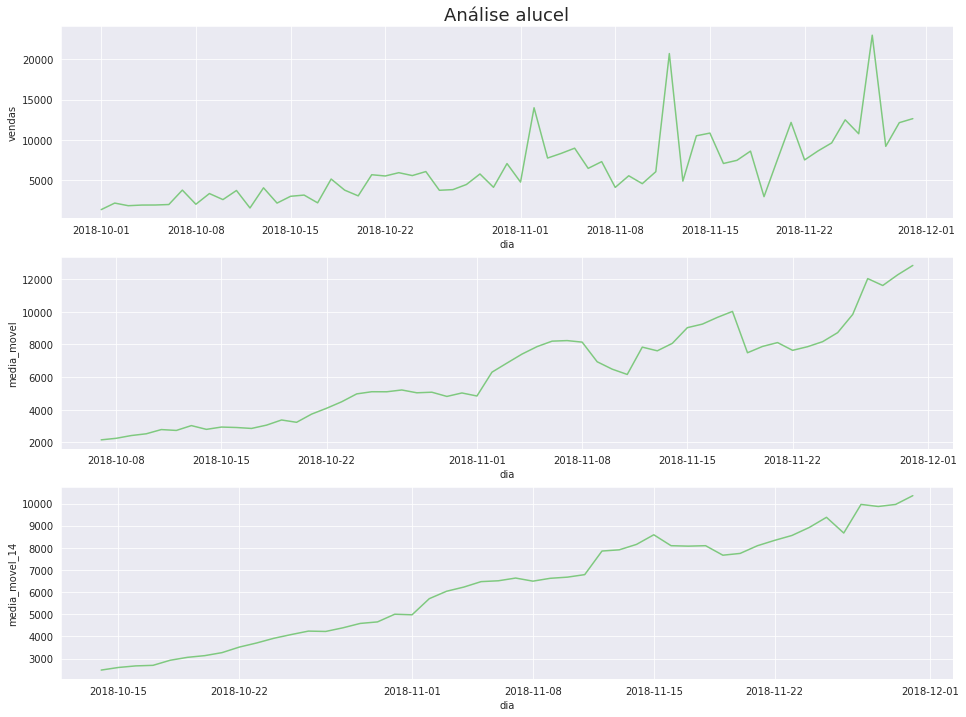

In [200]:
plot_comparacao('dia','vendas','media_movel','media_movel_14',alucel,'Análise alucel')

https://urbaninstitute.github.io/graphics-styleguide/